# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url + city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']["lat"]
        city_lng = city_response['coord']["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_wind = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]             
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | tamandare
Processing Record 9 of Set 1 | santiago del torno
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | bayan nur
City not found. Skipping...
Processing Record 13 of Set 1 | kudat
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | beloyarskiy
Processing Record 16 of Set 1 | thinadhoo
Processing Record 17 of Set 1 | ilam
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | maitum
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | galliano
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | dukhan
Processing Record 42 of Set 4 | maba
Processing Record 43 of Set 4 | jutai
Processing Record 44 of Set 4 | anloga
Processing Record 45 of Set 4 | baiti
Processing Record 46 of Set 4 | kedougou
Processing Record 47 of Set 4 | san ignacio de velasco
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | arkhangel'sk
Processing Record 0 of Set 5 | gustavsberg
Processing Record 1 of Set 5 | kayangel
Processing Record 2 of Set 5 | brookings
Processing Record 3 of Set 5 | cradock
Processing Record 4 of Set 5 | salida
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | arboletes
Processing Record 7 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | riverton
Processing Record 10 of Set 5 | korla
Processing Record 11 of Set 5 | diamantina
Processing Record 12 of Set 5 | ger

Processing Record 34 of Set 8 | fale old settlement
Processing Record 35 of Set 8 | bodo
Processing Record 36 of Set 8 | myeik
Processing Record 37 of Set 8 | al fuwayliq
Processing Record 38 of Set 8 | tacna
Processing Record 39 of Set 8 | kapa'a
Processing Record 40 of Set 8 | santa cruz
Processing Record 41 of Set 8 | rio de janeiro
Processing Record 42 of Set 8 | fiche
Processing Record 43 of Set 8 | fort mcmurray
Processing Record 44 of Set 8 | al mughraqah
Processing Record 45 of Set 8 | waingapu
Processing Record 46 of Set 8 | nagqu
Processing Record 47 of Set 8 | griffith
Processing Record 48 of Set 8 | villa ocampo
Processing Record 49 of Set 8 | chaparral
Processing Record 0 of Set 9 | san jose del guaviare
Processing Record 1 of Set 9 | saldanha
Processing Record 2 of Set 9 | gilgit
Processing Record 3 of Set 9 | mahina
Processing Record 4 of Set 9 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 9 | gouyave
Processing Record 6 of Set 9 | ixtapa
Pro

Processing Record 24 of Set 12 | tororo
Processing Record 25 of Set 12 | zangguy
City not found. Skipping...
Processing Record 26 of Set 12 | caleta de carquin
Processing Record 27 of Set 12 | anyang
Processing Record 28 of Set 12 | balikpapan
Processing Record 29 of Set 12 | mormugao
Processing Record 30 of Set 12 | zalari
Processing Record 31 of Set 12 | zakamensk
Processing Record 32 of Set 12 | patong
Processing Record 33 of Set 12 | mendi
Processing Record 34 of Set 12 | tyuratam
Processing Record 35 of Set 12 | khovd
Processing Record 36 of Set 12 | gwalior
Processing Record 37 of Set 12 | kerewan
Processing Record 38 of Set 12 | east london
Processing Record 39 of Set 12 | quibala
Processing Record 40 of Set 12 | medvedevo
Processing Record 41 of Set 12 | rosarito
Processing Record 42 of Set 12 | daru
Processing Record 43 of Set 12 | bazar-e yakawlang
City not found. Skipping...
Processing Record 44 of Set 12 | pithoragarh
Processing Record 45 of Set 12 | satara
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.26,82,1,6.70,SH,1699754244
1,quatre cocos,-20.2078,57.7625,23.06,81,4,3.72,MU,1699754244
2,udachny,66.4167,112.4000,-14.25,91,10,8.48,RU,1699754245
3,waitangi,-43.9535,-176.5597,14.34,75,0,2.68,NZ,1699754245
4,port alfred,-33.5906,26.8910,16.77,76,68,3.58,ZA,1699754245


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.26,82,1,6.70,SH,1699754244
1,quatre cocos,-20.2078,57.7625,23.06,81,4,3.72,MU,1699754244
2,udachny,66.4167,112.4000,-14.25,91,10,8.48,RU,1699754245
3,waitangi,-43.9535,-176.5597,14.34,75,0,2.68,NZ,1699754245
4,port alfred,-33.5906,26.8910,16.77,76,68,3.58,ZA,1699754245


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

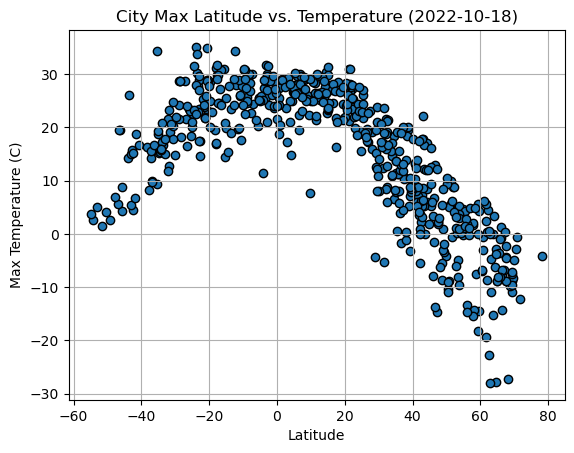

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

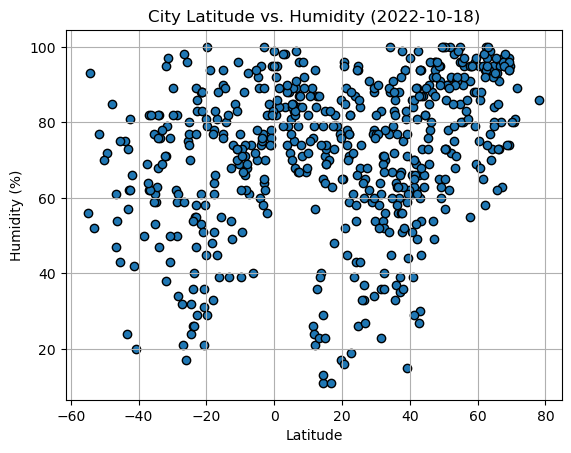

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

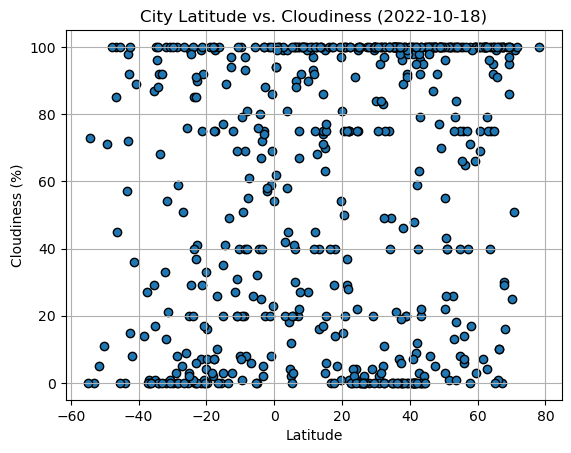

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

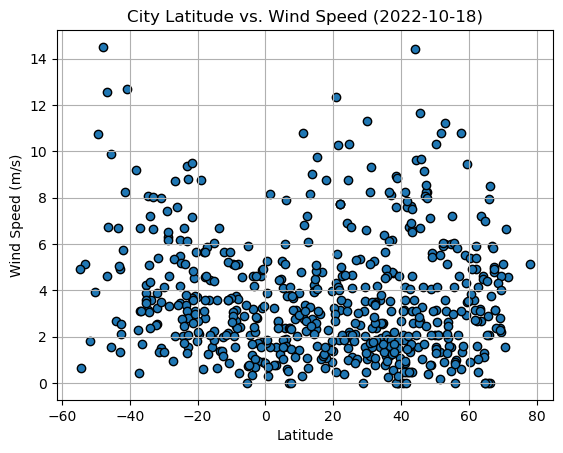

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def Regress_scat_Plot(dataframe, xCol, yCol, xLabel, yLabel):
    x = dataframe[xCol]
    y = dataframe[yCol]

    correlation_coefficient, _ = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    print(f"The rvalue is: {rvalue}")
    formula_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(min(x), max(y), formula_text, color='red', fontsize=16)

    plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
    plt.scatter(x, y)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    plt.show()

The rvalue is: -0.6486955459105629


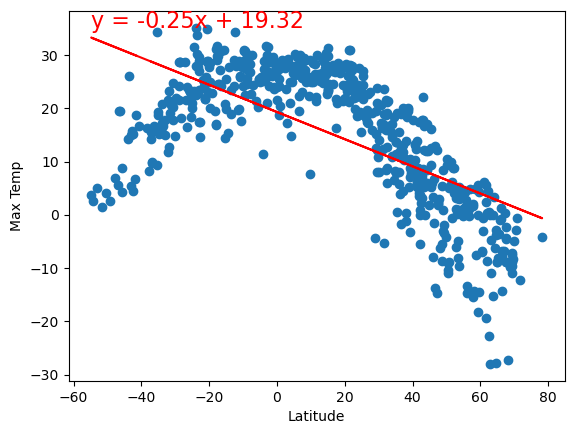

In [13]:
Regress_scat_Plot(city_data_df,'Lat','Max Temp', 'Latitude', "Max Temp")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,udachny,66.4167,112.4000,-14.25,91,10,8.48,RU,1699754245
5,bethel,41.3712,-73.4140,5.92,70,0,0.45,US,1699754245
9,tura,25.5198,90.2201,21.67,74,0,1.13,IN,1699754246
11,kudat,6.8837,116.8477,29.96,79,20,0.00,MY,1699754247
13,beloyarskiy,63.7119,66.6722,0.00,99,100,2.68,RU,1699754247


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat'] <= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.26,82,1,6.70,SH,1699754244
1,quatre cocos,-20.2078,57.7625,23.06,81,4,3.72,MU,1699754244
3,waitangi,-43.9535,-176.5597,14.34,75,0,2.68,NZ,1699754245
4,port alfred,-33.5906,26.8910,16.77,76,68,3.58,ZA,1699754245
6,karratha,-20.7377,116.8463,28.82,36,0,3.77,AU,1699754246


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8710271860130185


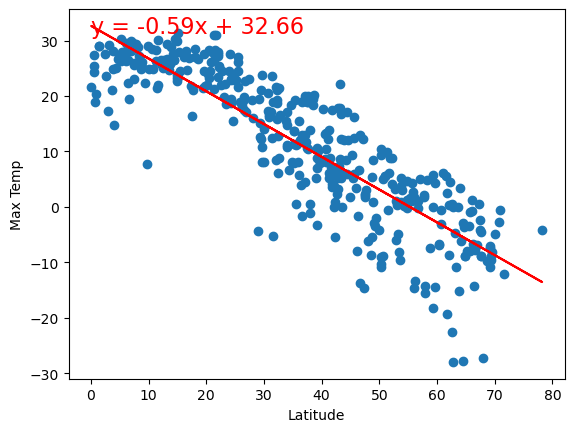

In [16]:
# Linear regression on Northern Hemisphere
Regress_scat_Plot(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude','Max Temp')

The rvalue is: 0.6885564859619329


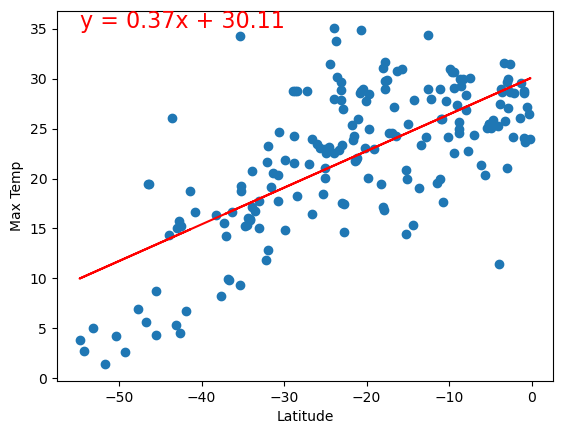

In [17]:
# Linear regression on Southern Hemisphere
Regress_scat_Plot(southern_hemi_df, 'Lat', 'Max Temp','Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.24419695047580012


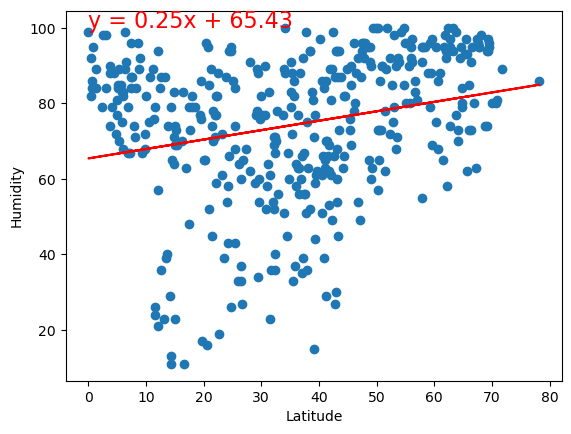

In [18]:
# Northern Hemisphere
Regress_scat_Plot(northern_hemi_df,'Lat', 'Humidity','Latitude', 'Humidity')

The rvalue is: 0.21282687709097842


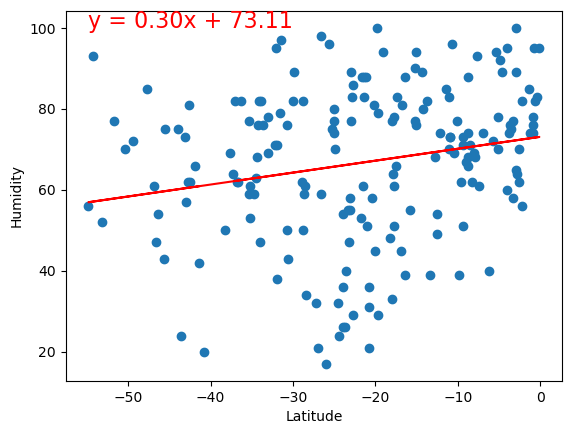

In [19]:
# Southern Hemisphere
Regress_scat_Plot(southern_hemi_df,'Lat','Humidity','Latitude','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.08309971785407587


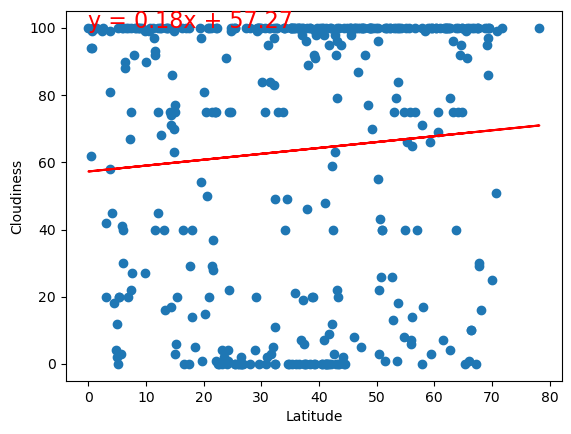

In [20]:
# Northern Hemisphere
Regress_scat_Plot(northern_hemi_df,'Lat','Cloudiness','Latitude', 'Cloudiness')

The rvalue is: 0.07046471867636599


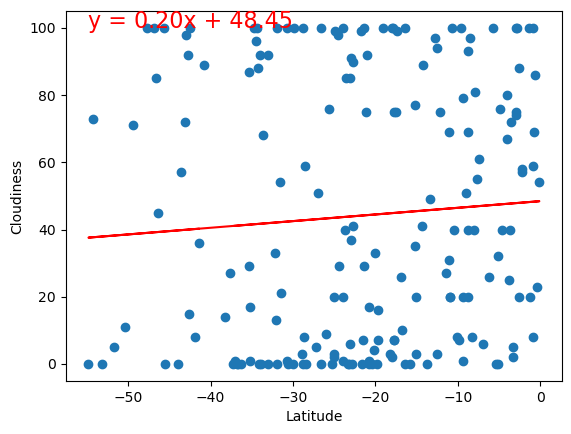

In [21]:
# Southern Hemisphere
Regress_scat_Plot(southern_hemi_df,'Lat','Cloudiness','Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.07766318659463955


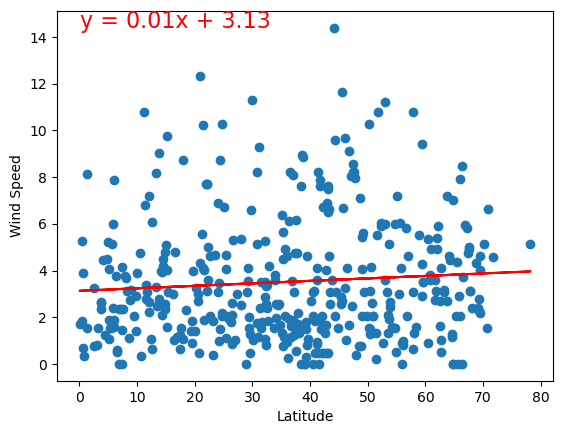

In [22]:
# Northern Hemisphere
Regress_scat_Plot(northern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed')

The rvalue is: -0.37116814820112354


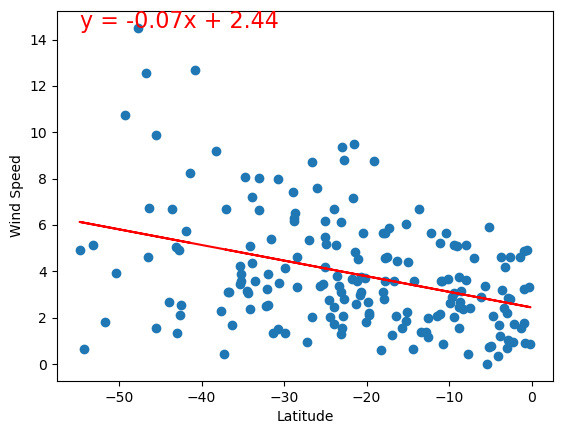

In [23]:
# Southern Hemisphere
Regress_scat_Plot(southern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE